#### Thanks to Shengyang Zhou for contributing his solution to exercise 6.4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

We compute a Brownian motion by creating a symmetric random walk and scaling it accordingly.

In [2]:
def BM(N):
    d = np.random.randint(2, size=N-1)
    d = [0]+[1 if x == 1 else -1 for x in d]
    return np.cumsum(d)/np.sqrt(N) # normalize

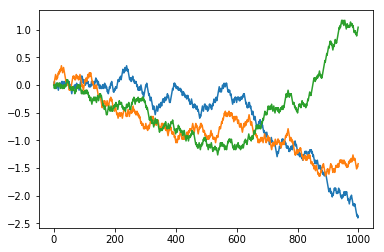

In [3]:
plt.plot(BM(1000))
plt.plot(BM(1000))
plt.plot(BM(1000))

To define the discrete integral, we use the following index convention:
$$I_X(H)_n = \sum_{i=0}^{n-1} H_i (X_{i+1} - X_i).$$

In [4]:
def Int(H, X):
    return np.cumsum(H[:-1] * np.diff(X))

We have $S^1_t = \exp(B_t)$ and $S^2_t = \exp(B_t/2)$.

In [5]:
def S(N):
    B = BM(N)
    return np.array([np.exp(B), np.exp(B/2)])

To create an arbitrage condition, we consider $S$ in its differential form.
By Ito's formula, we have
$$
   dS^1_t = S^1_t \left( \mu_1 dt + \sigma_1 dB_t \right),\\
   dS^2_t = S^2_t \left( \mu_2 dt + \sigma_2 dB_t \right),
$$
with $\mu_1 = 1/2$, $\sigma_1 = 1$, $\mu_2 = 1/8$ and $\sigma_2 = 1/2$.

From exercise 5.4 we know that this situation allows arbitrage because
$\mu_1/ \sigma_1 > \mu_2 /\sigma_2$.
It is easy to construct an arbitrage strategy.
Indeed, if $H = (H^1, H^2)$ is
a strategy for $S$ that satisfies
$\sigma^1 H^1_t S^1_t = \sigma^2 H^2 S^2$, then
the martingale part of the gain process
$V_t(H) = I_{S^1}(H^1) + I_{S^2}(H^2)$
vanishes, and we are left with a finite variation process
that is either decreasing or increasing.
If we pick
$$
    H^1 = 1, \\
    H^2 = - H^1 \frac{\sigma_1 S^1}{\sigma_2 S^2},
$$
then $V_t(H)$ is nonnegative and increasing. We implement this below.

In [6]:
N = 10000
S12 = S(N)
S1 = S12[0]
S2 = S12[1]
H1 = 5*np.ones(N)
H2 = -H1 * S1 * 1 / (S2 * 1/2)

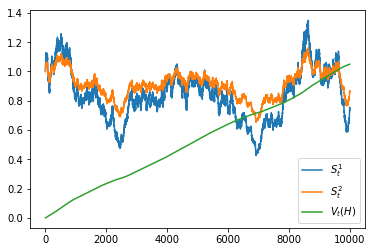

In [7]:
plt.plot(S1, label='$S^1_t$')
plt.plot(S2, label='$S^2_t$')
plt.plot(Int(H1, S1) + Int(H2, S2), label='$V_t(H)$')
plt.legend()